 # Profitability Analysis of a Retail Ad Campaign

### Introduction
I recently analyzed a dataset from a shopping mall’s paid search ad campaigns, covering several months of performance. Each entry represents how an individual ad group performed in a specific month, including impressions, clicks, conversions, cost, revenue, and profit or loss.

The goal was simple: to dig into the numbers and figure out which ads are truly profitable, and which ones are just burning cash. I wanted to spot the patterns, uncover what's working, and highlight where things could be improved.

🔗 Check out the dataset here on [Kaggle](https://www.kaggle.com/datasets/marceaxl82/shopping-mall-paid-search-campaign-dataset)

📘 [Read the full write-up on my portfolio](https://globaldatapath.com/portfolio/)

🔗 [Connect with me on LinkedIn](https://www.linkedin.com/in/stephen-adeniran-oluwatimilehin/)

💻 [View the project notebook on GitHub](https://github.com/stephendatapath)

### Project Objectives

1. Understand the distribution and behavior of key performance metrics (e.g., Revenue, P&L, CTR).

2. Apply descriptive and inferential statistics to draw meaningful conclusions.

3. Identify underperforming and overperforming ad campaigns.

4. Use the empirical rule and Z-scores to detect outliers.

5. Run a two-sample hypothesis test to compare performance patterns.

6. Provide data-backed recommendations to improve ad spend efficiency.



In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats 
import statsmodels.api as sms
import seaborn as sns

In [ ]:
set.pd

In [2]:
shop_data = pd.read_csv("final_shop_6modata.csv")

In [4]:
shop_data.head(20)

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604
5,Shop - 1:1 - Mob - [shop coupon code],July,46507,21756,0.47,1665,0.05,13157,0.60,8550,185824.49,-4606.713
6,Shop - 1:1 - Mob - [shop coupon],July,152394,59177,0.39,2666,0.04,19371,0.33,13699,294536.92,-5672.271
7,Shop - 1:1 - Mob - [shop discount code],July,9950,4283,0.43,347,0.05,2637,0.62,2038,46026.32,-598.993
8,Shop - 1:1 - Mob - [shop promo code],July,57373,27121,0.47,2940,0.07,16946,0.62,14565,321387.88,-2380.616
9,Shop - 1:1 - Mob - [shop promo],July,1875,706,0.38,69,0.07,485,0.69,409,8946.99,-75.734


In [6]:
shop_data.shape

(190, 12)

In [7]:
shop_data.tail(20)

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
170,Shop - Phrase - Desk - Coupon Code,November,7475,1977,0.26,382,0.12,2616,1.32,2368,50293.23,-248.203
171,Shop - Phrase - Desk - Sale,November,10262,667,0.06,30,0.05,386,0.58,165,3302.80,-220.842
172,Shop - Exact - Mob - Competitor,November,3155,871,0.28,54,0.06,402,0.46,268,6622.27,-134.484
173,Shop - 1:1 - Desk - [shop promo],November,2506,708,0.28,137,0.12,1039,1.47,910,19932.69,-129.125
174,Shop - Exact - Desk - Competitor,November,1692,341,0.20,43,0.09,342,1.01,258,5309.34,-84.485
175,Shop - 1:1 - Mob - [shop coupon code],November,99258,42283,0.43,4349,0.08,24149,0.57,24071,500400.85,-77.730
176,Shop - Exact - Desk - Offer,November,2760,434,0.16,71,0.12,553,1.28,496,11027.61,-56.945
177,Shop - Exact - Mob - Promo Code,November,51335,19009,0.37,2095,0.08,12189,0.64,12145,256314.93,-44.189
178,Shop - Exact - Desk - Free Shipping,November,1805,354,0.20,55,0.14,134,0.38,95,2156.07,-38.959
179,Shop - Exact - Mob - Free Shipping,November,3279,618,0.19,52,0.10,118,0.19,93,1855.08,-25.215


In [8]:
shop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB


The dataset contains 12 columns and 189 rows with no null value. 

In [9]:
shop_data.duplicated().sum()

np.int64(0)

In [10]:
shop_data.isnull().sum()

Ad Group       0
Month          0
Impressions    0
Clicks         0
CTR            0
Conversions    0
Conv Rate      0
Cost           0
CPC            0
Revenue        0
Sale Amount    0
P&L            0
dtype: int64

In [11]:
shop_data.columns.tolist()

['Ad Group',
 'Month',
 'Impressions',
 'Clicks',
 'CTR',
 'Conversions',
 'Conv Rate',
 'Cost',
 'CPC',
 'Revenue',
 'Sale Amount',
 'P&L']

In [14]:
shop_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Impressions,190.0,14077.363158,29771.686227,35.000,1065.0000,4969.000,13380.0000,276568.000
Clicks,190.0,4865.805263,11348.529219,2.000,264.5000,930.000,4190.5000,99526.000
CTR,190.0,0.272105,0.107894,0.050,0.1925,0.285,0.3600,0.470
Conversions,190.0,505.242105,1052.202922,0.000,24.0000,70.500,428.2500,7563.000
Conv Rate,190.0,0.079737,0.052859,0.000,0.0500,0.070,0.1000,0.500
Cost,190.0,3344.063158,6524.606753,1.000,188.5000,563.500,2967.0000,43542.000
CPC,190.0,0.791263,0.403312,0.140,0.4800,0.635,1.1075,2.020
Revenue,190.0,2957.684211,5962.413097,0.000,144.5000,459.500,2672.2500,42440.000
Sale Amount,190.0,63416.180579,125414.656922,0.000,2985.1350,10274.105,59345.1950,886095.310
P&L,190.0,-386.361916,903.073776,-5672.271,-294.9775,-75.978,-6.0275,1507.685


### Step 1: Data Cleaning & Summary
To begin this analysis, I loaded the dataset containing 190 rows and 12 columns, with each row representing the monthly performance of a paid search ad group. 

Column Overview
Below is the breakdown of what each column means in the context of campaign performance

Ad Group – Type of campaign (e.g., “Coupon Code”, “Promo”)

Month – Month the campaign ran

Impressions – Number of times the ad was displayed

Clicks – Number of user clicks

CTR – Click-through rate (Clicks ÷ Impressions)

Conversions – Number of users who completed a desired action

Conv Rate – Conversion rate (Conversions ÷ Clicks)

Cost – Amount spent on the campaign

CPC – Cost per click (Cost ÷ Clicks)

Revenue – Income generated directly from the ad campaign

Sale Amount – Total value of sales tied to the campaign

P&L – Profit or Loss after subtracting ad cost

### Data Quality Check
After inspecting the dataset, I found:

✅ No missing values

✅ All columns are appropriately typed (no string-formatted numbers)

✅ No formatting issues or corrupted entries

So I didn’t need to do any major cleaning.

### Descriptive Statistics & Business Observations
Here’s what stood out when I looked at the summary statistics

Impressions vary greatly — from just 35 to over 276,000. Some campaigns clearly get far more exposure than others.

Clicks follow a similar pattern — some ad groups get just 2 clicks, others get over 99,000.

The CTR (Click-Through Rate) is mostly healthy — the median is 0.285, and the highest performing campaigns hit 0.47.

For Conversions, the median is 70.5, but one campaign hit 7,563, while some had zero — a clear sign of performance gaps.

Conversion Rate ranges from 0% to 50%, but the average sits around 8%, which is decent. That 50% case is rare and might need a second look to check if it’s skewed.

Cost also varies a lot — from $1 to over 43,000, meaning some campaigns were barely funded, others had major investment.

CPC (Cost Per Click) averages at $0.79, with the cheapest being 0.14 and the most expensive 2.02 — this gives me room to study ad efficiency.

Revenue goes from $0 to 42,440, and Sale Amount shows massive sales variance (up to 886,095 in one case).

**Most importantly, the average P&L is negative (-$386). Some campaigns lost as much as 5,672, meaning many campaigns are not profitable.**


This first look at the dataset confirms there’s a huge difference in how ad groups perform. Some attract big traffic and revenue, while others waste money with poor returns.

The fact that the average campaign runs at a loss signals a serious opportunity to improve how the mall allocates ad budget. My next goal is to dig deeper into patterns, inefficiencies, and hidden opportunities using visual EDA.



#### Deep Exploratory Data Analysis

1. Campaign Overview: Ad Groups & Performance

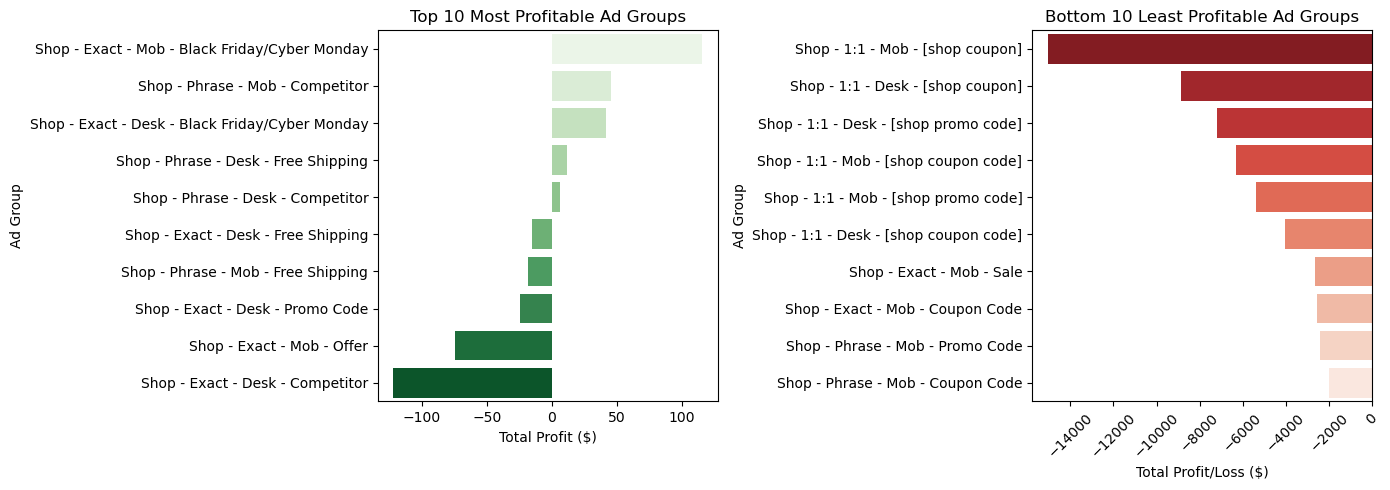

In [19]:
# Top and Bottom 10 Ad Groups by Profit
top_profit = shop_data.groupby('Ad Group')['P&L'].sum().sort_values(ascending=False).head(10)
bottom_profit = shop_data.groupby('Ad Group')['P&L'].sum().sort_values(ascending=True).head(10)

# Plot
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.barplot(x=top_profit.values, y=top_profit.index, hue=top_profit.index, palette='Greens', legend=False)
plt.title('Top 10 Most Profitable Ad Groups')
plt.xlabel('Total Profit ($)')

plt.subplot(1,2,2)
sns.barplot(x=bottom_profit.values, y=bottom_profit.index, hue=top_profit.index, palette='Reds_r', legend=False)
plt.title('Bottom 10 Least Profitable Ad Groups')
plt.xlabel('Total Profit/Loss ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


2. Cost vs Revenue Relationship

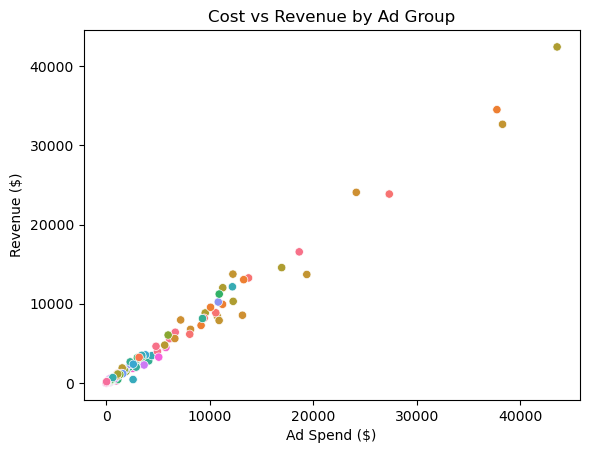

In [20]:
sns.scatterplot(data=shop_data, x='Cost', y='Revenue', hue='Ad Group')
plt.title('Cost vs Revenue by Ad Group')
plt.xlabel('Ad Spend ($)')
plt.ylabel('Revenue ($)')
plt.legend([],[], frameon=False)
plt.show()


3. Monthly Trend in Profitability
Let’s look at how profits changed over time (by month).

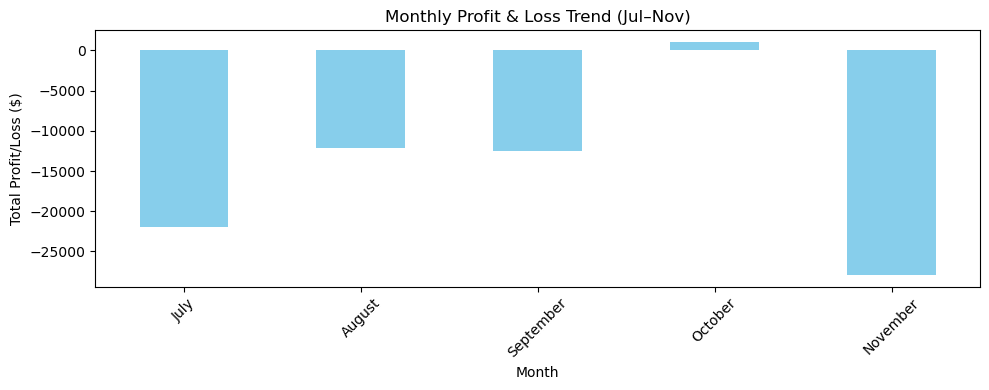

In [25]:
import calendar

# Standardize month names
shop_data['Month'] = shop_data['Month'].str.strip().str.capitalize()

# Define correct month order
month_order = ['July', 'August', 'September', 'October', 'November']
shop_data['Month'] = pd.Categorical(shop_data['Month'], categories=month_order, ordered=True)

# Group by month and plot
monthly_profit = shop_data.groupby('Month', observed=True)['P&L'].sum().sort_index()

monthly_profit.plot(kind='bar', figsize=(10,4), color='skyblue')
plt.title('Monthly Profit & Loss Trend (Jul–Nov)')
plt.ylabel('Total Profit/Loss ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The first image above compares the **top 10 most profitable and bottom 10 least profitable ad groups**. What stands out is that the most profitable campaigns barely made any significant profit, while the worst-performing ones recorded massive losses, some over $5,000. Many of these losses came from mobile ads using promo codes or coupons. This shows that while discounts may drive engagement, they didn’t necessarily result in profitability. On the flip side, campaigns targeting Black Friday, free shipping, or competitors performed relatively better, though their profit margins were still slim. This highlights the need to rethink heavy discount strategies that look good on the surface but end up bleeding money.

The second and third visuals give broader context. The Cost vs Revenue scatter plot shows a strong positive relationship: higher ad spend usually results in higher revenue. But as we can see, high revenue doesn’t mean high profit, some of the highest spenders were still unprofitable. Finally, the monthly profit & loss trend confirms a worrying pattern: every month from July to November ended in a loss, with November, the supposed high season, being the worst. Together, these visuals suggest that while campaigns are generating visibility and sales, poor cost control and strategy are dragging down the overall return on investment.

## Statistical Analysis

Now, you want to find out whether revenue fits a specific type of probability distribution. i will Create
 a histogram to visualize the distribution of revenue. Then, based on its shape, visually determine
 if it resembles a particular distribution.

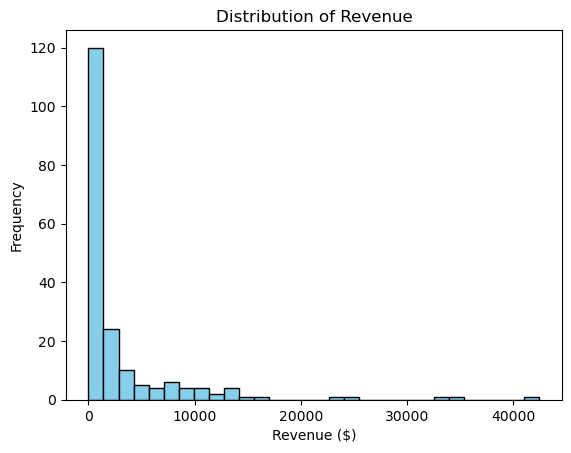

In [26]:
shop_data['Revenue'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


The revenue distribution is positively (right) skewed.
This suggests that while the majority of ad campaigns generate relatively modest income, a few standout performers bring in disproportionately high revenue. These top campaigns may be responsible for a large share of total business earnings and should be further analyzed or scaled.

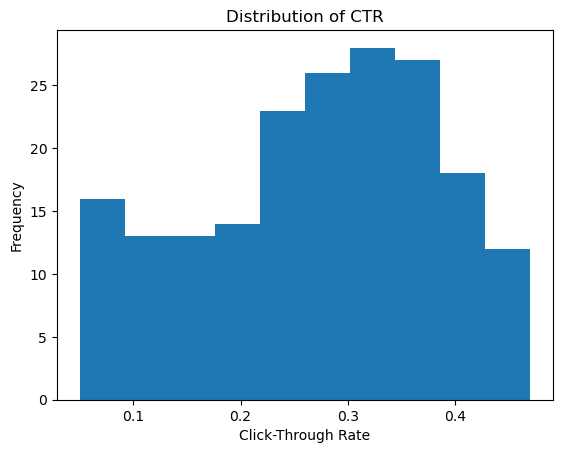

In [28]:
shop_data['CTR'].hist()
plt.title('Distribution of CTR')
plt.xlabel('Click-Through Rate')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


The distribution of Click-Through Rate (CTR) is slightly left-skewed, but still retains a rough bell-shaped curve, suggesting it is approximately normal.

This means most ad groups receive moderate CTRs — typically around the center — while a few perform lower than average.

From a business perspective, this indicates a generally consistent audience response, with room to improve underperforming campaigns on the lower end of the curve through better targeting, creatives, or call-to-action optimization.

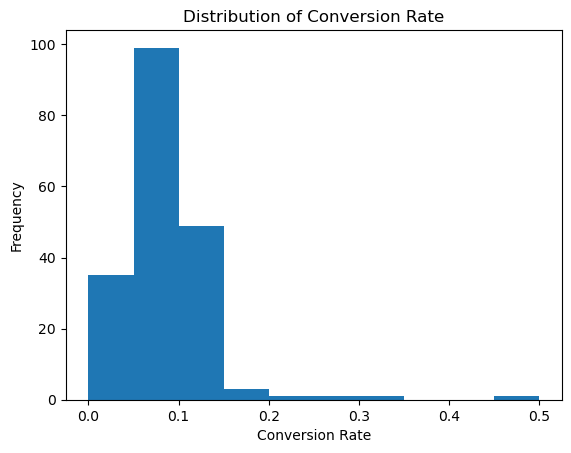

In [29]:
shop_data['Conv Rate'].hist()
plt.title('Distribution of Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The distribution of Conversion Rate is slightly right-skewed, but maintains an approximately normal (bell-shaped) form.

This suggests that most ad groups convert at a moderate rate, with a few campaigns achieving unusually high conversion rates.

From a business perspective, this means the majority of ads perform consistently in turning clicks into conversions, while some standout campaigns may offer clues for optimization or scaling.

## Empirical Rule & Outlier Detection on P&L

Every business exists to make profit and that's why I’m making Profit and Loss (P&L) the main focus of this analysis. To make smarter decisions, I want to understand how profit behaves across different ad campaigns.

In this step, I’ll:

Check whether P&L follows a normal distribution

Apply the Empirical Rule (68–95–99.7%) to see how much of the data lies within 1, 2, and 3 standard deviations from the mean

Use Z-scores to detect potential outliers — ad groups that are either big losses or outstanding performers

This will help me identify what’s working, what’s not, and where the business might be leaking or gaining the most money.

<Axes: >

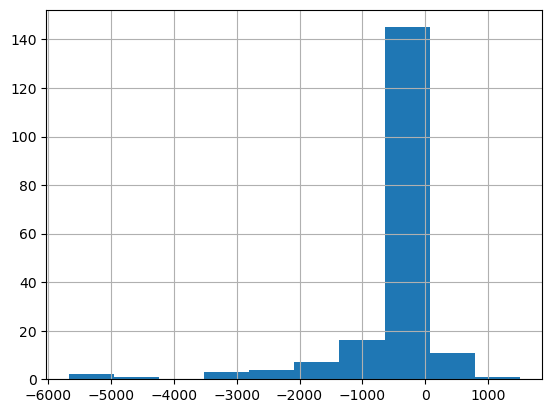

In [30]:
#Lets check the distribution of the Profit and Loss column 

shop_data["P&L"].hist()

To start, I checked the distribution of P&L to see if it follows a normal pattern. The result shows a slightly left-skewed distribution but still apears normal. The mean P&L which is around -386.36. Normal distribution is a continuous probability distribution that is bell-shaped and symmetrical on both sides of the mean.
What this means is that most ad campaigns are running at a loss, with only a few generating profit. It’s a clear sign that the business is spending more on ads than it's gaining back in several areas. This insight helps me focus on identifying what’s causing these losses and what’s making the profitable campaigns stand out.

### Empirical rule

Since the normal distribution seems like a good fit for the Profit and Loss data, we can expect the empirical rule to apply relatively well. The **empirical rule** says that for a normal distribution:

*   **68%** of the values fall within +/- 1 SD from the mean
*   **95%** of the values fall within +/- 2 SD from the mean
*   **99.7%** of the values fall within +/- 3 SD from the mean

**NOTE**: "SD" stands for standard deviation.

 In other words, we can expect that about:

*   **68%** of ad campaign Proft and Loss data will fall within +/- 1 SD from the mean.
*   **95%** of ad campaign Profit and Loss data will fall within +/- 2 SD from the mean.
*   **99.7%** of ad campaign Profit and Loss data will fall within +/- 3 SD from the mean.



**Next, i will create two variable to store the mean and the standard deviation and the Profit and Loss: mean_pl and std_pl**

In [33]:
mean_pl = shop_data['P&L'].mean()
mean_pl

np.float64(-386.36191578947364)

In [35]:
std_pl = shop_data['P&L'].std()
std_pl

903.0737755270911

The mean of the profit and loss is -386.36, and the stadandard deviation is 903.07. 

Now lets compute the actual percentage of the profit and loss that falls within +/- SD from the mean. 
i will create two new variables using the mean and standard deviation result. The new variables will be name lower limit and upper_limit. 

In [36]:
lower_limit = mean_pl - 1 * std_pl 
upper_limit = mean_pl + 1 * std_pl 
((shop_data['P&L'] >= lower_limit) & (shop_data['P&L'] <= upper_limit)).mean()

np.float64(0.8789473684210526)

In [37]:
lower_limit = mean_pl - 2 * std_pl 
upper_limit = mean_pl + 2 * std_pl 
((shop_data['P&L'] >= lower_limit) & (shop_data['P&L'] <= upper_limit)).mean()

np.float64(0.9526315789473684)

In [42]:
lower_limit = mean_pl -3 * std_pl
upper_limit = mean_pl +3 * std_pl
((shop_data['P&L'] >= lower_limit) & (shop_data['P&L'] <= upper_limit)).mean()

np.float64(0.9736842105263158)

After analyzing the distribution of P&L, I tested how well it aligns with the Empirical Rule (68–95–99.7%), which applies to normally distributed data.

My results show:

87.9% of P&L values fall within ±1 SD

95.3% fall within ±2 SD

97.4% fall within ±3 SD

These results are quite close to what the empirical rule predicts, which confirms that the data behaves mostly normal, even though it’s slightly skewed.

The fact that 87.9% of the values fall within just 1 standard deviation (higher than the expected 68%) tells me that the P&L values are tightly packed around the mean, with fewer extreme shifts. In business terms, it suggests that most ad campaigns are clustered around similar loss or profit levels and only a few are outliers. This supports the use of further statistical techniques like Z-scores.

Next, I’ll compute Z-scores to detect outliers.
In this case, an outlier is an ad campaign whose profit or loss is far from the average, either a major loss that's hurting the business, or an exceptional performer that could be scaled further.

To find outlier in the data i will create a new column called Z-score 

In [47]:
shop_data['zscore'] = stats.zscore(shop_data['P&L'])

In [48]:
shop_data.head()

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,z-score,zscore
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086,0.132427,0.132427
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951,-0.108349,-0.108349
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136,0.559011,0.559011
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921,0.167028,0.167028
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604,0.369446,0.369446


**Now, lets identify outliers or ad campaign with z-score that are more than +/- 3 standard deviations.** 

In [49]:
shop_data[(shop_data['zscore'] > 3) | (shop_data['zscore'] < -3)]

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,z-score,zscore
5,Shop - 1:1 - Mob - [shop coupon code],July,46507,21756,0.47,1665,0.05,13157,0.60,8550,185824.49,-4606.713,-4.685665,-4.685665
6,Shop - 1:1 - Mob - [shop coupon],July,152394,59177,0.39,2666,0.04,19371,0.33,13699,294536.92,-5672.271,-5.868706,-5.868706
151,Shop - 1:1 - Mob - [shop coupon],November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.10,-5605.297,-5.794348,-5.794348
152,Shop - 1:1 - Desk - [shop coupon],November,73448,25283,0.34,4080,0.10,27336,1.08,23857,497790.81,-3478.644,-3.433221,-3.433221
153,Shop - 1:1 - Desk - [shop promo code],November,64067,23538,0.37,5782,0.15,37729,1.60,34518,725773.92,-3211.121,-3.136202,-3.136202


After computing Z-scores on the P&L data, I discovered five ad campaigns with Z-scores less than –3 as you can see above, it means their losses were extremely far below the average and fall outside the normal pattern of performance. These are strong negative outliers, and they deserve immediate attention.

These campaigns (especially in July and November) had:

Very high impressions and clicks

Thousands of conversions

But still ended up with huge losses of over –$3,000 to – 5,600

This tells me something is severely broken in the funnel:

Either the cost per conversion is too high

Or the revenue generated per conversion is too low

Or perhaps there’s wasted ad spend on low-quality traffic that didn’t bring enough ROI



**These ads might look like they’re performing (because of high clicks and conversions), but financially they’re draining the business. It’s a classic case where volume doesn’t equal value.**

**These campaigns may need to be paused, reviewed or restructured. I’d recommend checking the CPC vs. average revenue per sale and verifying if discounts or coupon codes are cutting too deeply into margins.**
**Most of the ad groups are clustered around losses, with no campaign making significantly high profit.This tells me the business is playing defense, not offense and that needs fixing.**



**Hypothesis Testing**

In this step, I want to perform a two-sample hypothesis test to compare whether the average revenue generated by high-loss ad campaigns is significantly different from that of the normal-performing campaigns. This will help me understand if these loss-making campaigns are at least driving strong sales volume, or if they’re simply unprofitable without delivering business value.

I will filter the dataframe for the two groups i will be using for the hypothesis testing. Group A is the high loss campaign and Group B is Normal performing campaign. 

In [52]:
group_A = shop_data[shop_data['zscore'] < -3]['Revenue']
group_B = shop_data[(shop_data['zscore'] >= -3) & (shop_data['zscore'] <= 3)]['Revenue']

In [54]:
mean_a = group_A.mean()
mean_a

np.float64(22658.4)

In [60]:
mean_b = group_B.mean()
mean_b

np.float64(2425.2324324324322)


**Steps for performing an Hypotheis testing**
1. State the null hypothesis and the alternative hypothesis.
2. Choose a significance level.
3. Find the p-value.
4. Reject or fail to reject the null hypothesis.

step 1:

Null Hypothesis: There is no significant difference in average revenue between high-loss and normal campaigns.

Alternative Hypotheis: There is a significant difference in average revenue between the two groups.

Step 2: Choose a significance level

This is the probability of rejecting the null hypothesis when it is true. For this project i will be using 5% or 0.05.

Step 3: Find the p-value

Based on the group data, the difference between the mean **Revenue** of Group A and Group B is 20,233.4. The null hypothesis claims that this difference is due to chance. The p-value is the probability of observing an absolute difference in group means that is 20,233.4 or greater if the null hypothesis is true. If the probability of this outcome is very unlikely—in particular, if the p-value is less than the significance level of 5% then i will reject the null hypothesis.

In [65]:
stats.ttest_ind(a=group_A, b=group_B, equal_var=False)

TtestResult(statistic=np.float64(3.952624045859938), pvalue=np.float64(0.01647636216227075), df=np.float64(4.037975427399182))

Based on the hypothesis test result, there is only a 1.65% probability that the large difference in average revenue between the two ad campaign groups happened by random chance.

The high-loss campaigns (Group A) had an average revenue of 22,658.40, while the normal campaigns (Group B) only averaged 2,425.00 in revenue. That’s a difference of $20,233.40.

Since the p-value is less than 0.05, **I reject the null hypothesis** and conclude that high-loss campaigns generate significantly higher revenue than normal campaigns.

Although these campaigns show a net loss in profit, they are driving strong sales volume. This suggests they may have strategic value (e.g., attracting new customers, boosting market reach) and rather than discontinuing them, it may be worth optimizing their cost structure or reviewing their pricing and conversion strategy to improve overall ROI.

# KEY FINDINGS
Most ad groups are unprofitable.

1. Coupon-based mobile ads consistently perform poorly.

2. Only a few campaigns (Black Friday, Competitor targeting) actually deliver profit.

3. Ad spend increases revenue but not necessarily profit.

4. Revenue is not the same as return—many high-revenue ads still lost money.

5. Monthly trends show no continuous improvement, indicating poor campaign optimization.

### Business Insights
1. Many ads are spending too much for too little return.

2. Profit-focused optimization is missing, strategy seems to chase clicks or revenue instead.

3. Seasonal or competitor-focused campaigns are a better use of resources.

4. Campaign managers must track profit, not just engagement metrics.

### Recommendations
1. Pause or rework coupon-based campaigns, especially on mobile.

2. Prioritize top performers like Black Friday/Cyber Monday and competitor-targeting.

3. Implement monthly z-score analysis to flag high-loss campaigns early.

4. Adopt performance-based budgeting—allocate more to proven profitable ad groups.

5. Introduce A/B testing monthly to keep learning what works.